In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10


In [2]:
# The class names for the CIFAR-10 dataset are predefined and can be found in the official documentation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


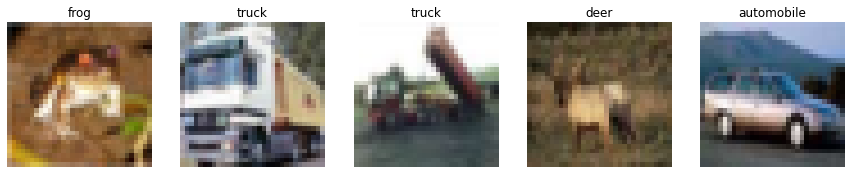

In [4]:
# Plot the first 5 images from the training set
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].set_title(class_names[y_train[i][0]])
    axs[i].axis('off')
plt.show()

In [5]:
x_train[1].shape # This shows the shape of one of the train images (length, width, channel)


(32, 32, 3)

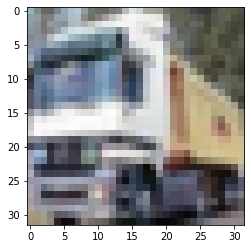

In [6]:
plt.imshow(x_train[1])


In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train[0][0][0][1]

62

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
len(y_train)

50000

In [11]:
y_train.ndim

2

In [12]:
y_train.shape


(50000, 1)

In [13]:
# Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#For preprocessing, the ImageDataGenerator is used.
#It is used for the generation of batches of augmented image data
#in real-time during the training process;


In [15]:
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
rotation_range=20, # Randomly rotate images up to 10 degrees
width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
horizontal_flip=True, # Randomly flip images horizontally
vertical_flip=False, # Don't randomly flip images vertically
shear_range=0.10, # crops part of the image
zoom_range=0.10 # #zooms the image by 10%
)


In [16]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

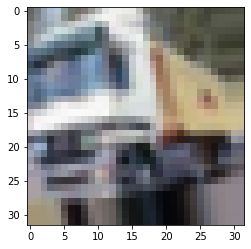

In [17]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[1]))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [19]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [20]:
# print the summary of the model constructed
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [34]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
# Train the model with 20 epochs and batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=20: The model will be trained for 20 epochs;
#This means the dataset will be passed through the model 20 times for training.
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
1563/1563 [==============================] - 108s 66ms/step - loss: 2.3030 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 108s 67ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 106s 66ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 107s 67ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 107s 67ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 107s 67ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 100s 62ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2

<AxesSubplot:>

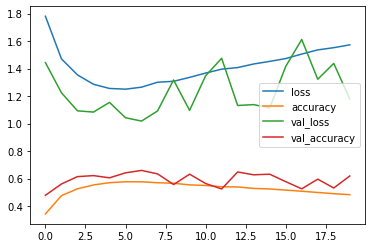

In [24]:
import pandas as pd
pd.DataFrame(history.history).plot()

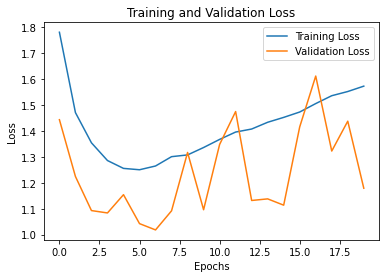

In [25]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

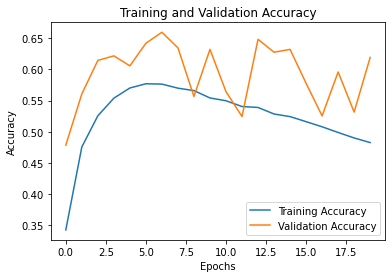

In [26]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [27]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1),
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 [==============================] - 6s 16ms/step


In [28]:
print(y_pred)

[9 8 8 ... 7 1 7]


In [29]:
model.predict(x_test).shape

313/313 [==============================] - 5s 16ms/step


(10000, 10)

In [30]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1000
           1       0.87      0.79      0.83      1000
           2       0.50      0.44      0.47      1000
           3       0.50      0.18      0.27      1000
           4       0.46      0.59      0.52      1000
           5       0.63      0.44      0.52      1000
           6       0.50      0.88      0.63      1000
           7       0.61      0.73      0.66      1000
           8       0.81      0.71      0.76      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



<Figure size 2000x3000 with 0 Axes>

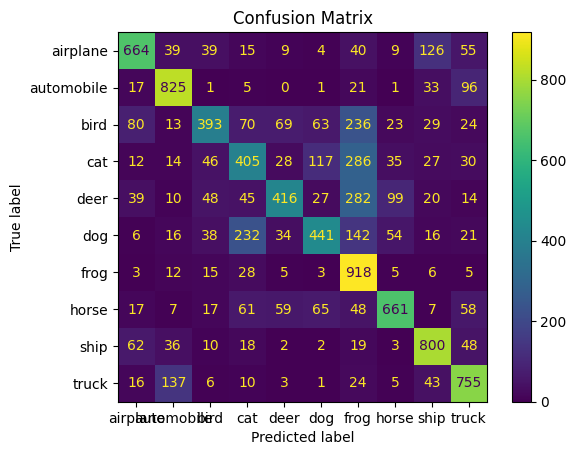

In [34]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()